## Закономерности, определяющие предпочтения пользователей авиаперелетов

### Шаг 1. Откройте файл с данными и изучите общую информацию

Импорт библиотек:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Чтение таблиц:

In [3]:
aircrafts = pd.read_csv('query_1.csv')
aircrafts

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
flights = pd.read_csv('query_3.csv')
flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Основные сведения о датафреймах и используемых типах данных:

In [55]:
# воспользуемся циклом для одновременно запроса сведений сразу по двум датафреймам
for name_data in [aircrafts, flights]:
    display(name_data.info())
    print(f'Количество дубликатов: {name_data.duplicated().sum()}')
    print('-' * 40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

Количество дубликатов: 0
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

Количество дубликатов: 0
----------------------------------------


Таким образом, в обоих датафреймах:
* наименования столбцов указаны в нижнем регистре и с подчеркивание для составных слов;
* отсутствуют дубликаты и пропуски;
* типы данных определены корректно

### Шаг 2. Исследовательский анализ данных

Топ-10 городов по количеству рейсов:

In [14]:
# воспользуемся методом nlargest, применив его к датаферйму flights
top10_cities = flights.nlargest(10, 'average_flights')
# изучим список
top10_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Проанализировав рейтинг 10-ти популярных городов по количеству в среднем рейсов, можно отметить, что лидирующие позиции занимают два города федерального назначения: Москва и Санкт-Петербург. С третьей строчки и по шестую занимают несколько других крупных региональных городов. В то же время город Сочи, который является курортным городом, занимает лишь 9 строчку.

Построение графиков:

Text(0, 0.5, 'Модели самолетов')

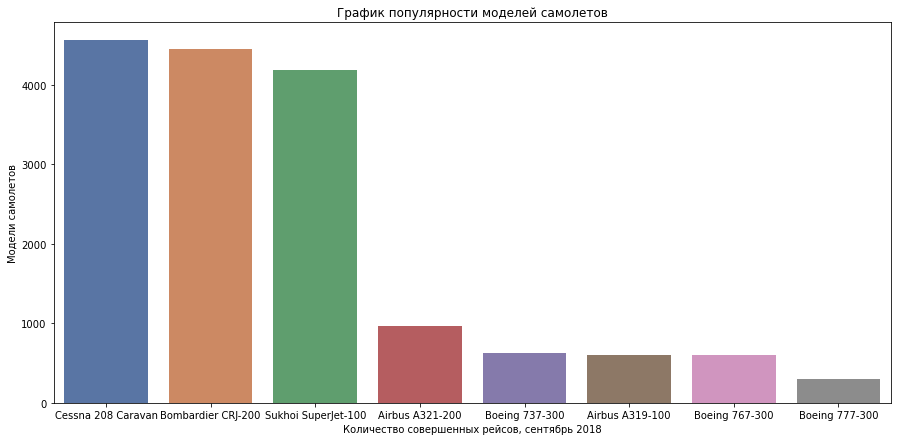

In [69]:
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='model', y='flights_amount', palette="deep", data=aircrafts.sort_values(by='flights_amount', ascending=False))
plt.title('График популярности моделей самолетов')
plt.xlabel('Количество совершенных рейсов, сентябрь 2018')
plt.ylabel('Модели самолетов')

Text(0, 0.5, 'Модели самолетов')

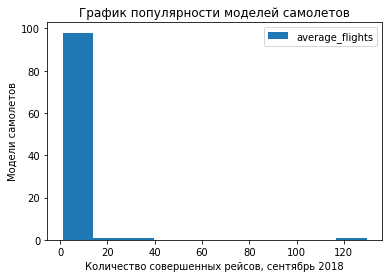

In [81]:
flights.sort_values(by='average_flights')..plot(kind='line',y='average_flights')
plt.title('График популярности моделей самолетов')
plt.xlabel('Количество совершенных рейсов, сентябрь 2018')
plt.ylabel('Модели самолетов')

Text(0, 0.5, 'Модели самолетов')

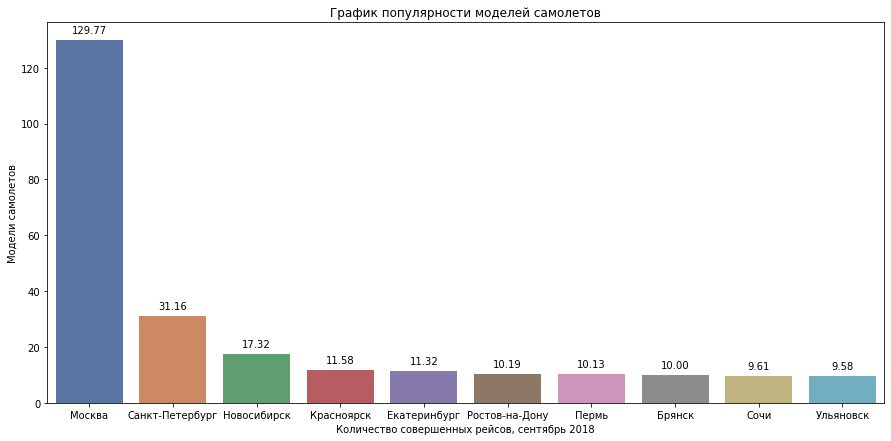

In [71]:
f, ax = plt.subplots(figsize=(15, 7))
splot3 = sns.barplot(x='city', y='average_flights', palette="deep", data=flights[flights.city.isin(top10_cities.city)]
            .sort_values(by='average_flights', ascending=False))
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('График популярности моделей самолетов')
plt.xlabel('Количество совершенных рейсов, сентябрь 2018')
plt.ylabel('Модели самолетов')

### Шаг 3. Проверьте гипотезу, что количество рейсов во время фестивателей увеличивается